In [1]:
#import required libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from tensorflow import set_random_seed


Using TensorFlow backend.


In [0]:
set_random_seed(300)

In [3]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


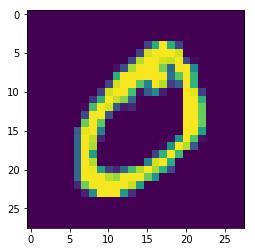

In [4]:
# summarize the dataset and show one image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [5]:
print (X_train.mean(),X_train.std())

33.318421449829934 78.56748998339798


In [6]:
print (X_test.mean(),X_test.std())


33.791224489795916 79.17246322228644


In [0]:
train_X= X_train
test_X = X_test

In [0]:
# Reshaping the images from 28x28 to 28x28x1, thus making the shape of the array contain channel information

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### **Image Normalization**

In [9]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
(64, 28, 28, 1) 0.008841392 1.0089799
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

**Reshape the input to have the dimension for channel**

In [0]:
X_train = batchX
X_test = batch_testX

In [0]:
y_train=batchy
y_test=batch_testy

In [0]:
# Converting integer labels into one-hot encodings as to make the label dimension same as the number of output neurons 
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
# print one hot encoding values of 1st ten images
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model with relu activation function and L2-Regularizer

In [15]:

from keras import regularizers
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.001))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.001))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu',kernel_regularizer=regularizers.l2(0.001))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.001)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

W0801 21:42:46.886980 140511060301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
W0801 21:42:46.897459 140511060301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 21:42:46.906903 140511060301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 21:42:46.955555 140511060301696 deprecation_wrapper

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

### Save model with best accuracy

In [0]:
import keras.callbacks
from keras.callbacks import *
checkpointer = ModelCheckpoint(filepath='save_model.h5', monitor='val_loss', mode='auto', verbose = 1, save_best_only=True)


### compile the model

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


In [32]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test),callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 161us/step - loss: 0.3418 - acc: 0.8936 - val_loss: 0.1451 - val_acc: 0.9768

Epoch 00001: val_loss did not improve from 0.06972
Epoch 2/40
60000/60000 [==============================] - 7s 123us/step - loss: 0.3435 - acc: 0.8942 - val_loss: 0.1031 - val_acc: 0.9872

Epoch 00002: val_loss did not improve from 0.06972
Epoch 3/40
60000/60000 [==============================] - 7s 123us/step - loss: 0.3504 - acc: 0.8915 - val_loss: 0.1193 - val_acc: 0.9844

Epoch 00003: val_loss did not improve from 0.06972
Epoch 4/40
60000/60000 [==============================] - 8s 126us/step - loss: 0.3510 - acc: 0.8926 - val_loss: 0.1244 - val_acc: 0.9828

Epoch 00004: val_loss did not improve from 0.06972
Epoch 5/40
60000/60000 [==============================] - 7s 124us/step - loss: 0.3508 - acc: 0.8933 - val_loss: 0.1143 - val_acc: 0.9868

Epoch 00005: val_loss did not improve from 0.06972

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.1209671659231186, 0.9829]


### **25 Misclassfied images**

In [0]:
predict=model.predict_classes(X_test)

In [0]:
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
incorrects=incorrects[0]
incorrects=incorrects.tolist()

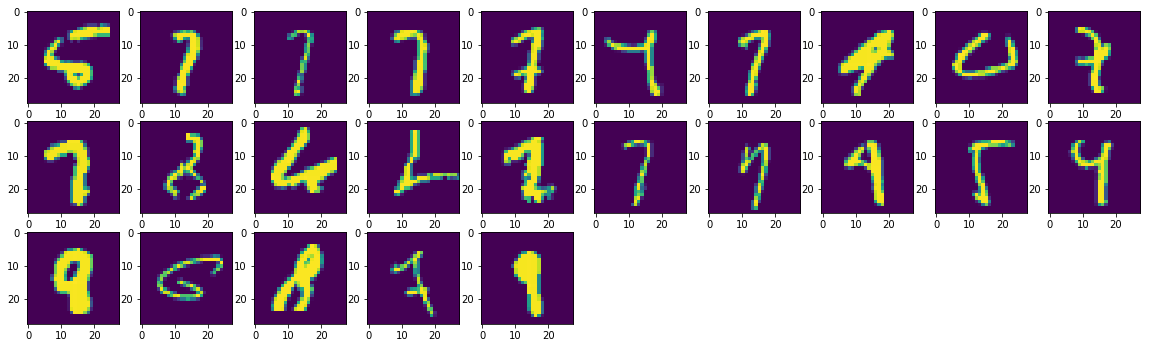

In [36]:
fig=plt.figure(figsize=(20,20))
rows=10
columns = 10
i=0
for j in (incorrects):
  if i <25:
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(test_X[j])
    i=i+1
plt.show()